In [80]:
import yfinance as yf

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")


In [81]:
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800,0.0,0.0
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,0.0,0.0
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,0.0,0.0
1986-03-18,0.064384,0.064929,0.062201,0.062746,67766400,0.0,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

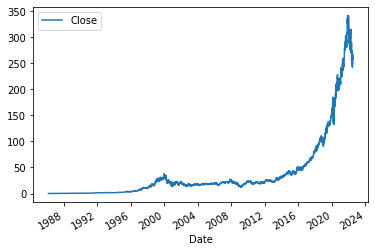

In [82]:
msft_hist.plot(y ="Close", use_index = True)

In [83]:
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close' : 'Actual Close'})
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

data['Target'].value_counts()

1.0    4626
0.0    4524
Name: Target, dtype: int64

In [84]:
data.head(5)

,Actual Close,Target
Date,,
1986-03-13,0.061109,NaN
1986-03-14,0.063292,1.0
1986-03-17,0.064384,1.0
1986-03-18,0.062746,0.0
1986-03-19,0.061655,0.0


In [85]:
msft_prev = msft_hist.copy()

In [86]:
msft_prev = msft_prev.shift(1)

In [87]:
msft_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055654,0.063838,0.055654,0.061109,1.031789e+09,0.0,0.0
1986-03-17,0.061109,0.064384,0.061109,0.063292,3.081600e+08,0.0,0.0
1986-03-18,0.063292,0.064929,0.063292,0.064384,1.331712e+08,0.0,0.0
1986-03-19,0.064384,0.064929,0.062201,0.062746,6.776640e+07,0.0,0.0


In [88]:
predictors = ["Close", "High", "Low", "Open", "Volume"]
data = data.join(msft_prev[predictors]).iloc[1:]

In [89]:
data.head(5)

,Actual Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14,0.063292,1.0,0.061109,0.063838,0.055654,0.055654,1.031789e+09
1986-03-17,0.064384,1.0,0.063292,0.064384,0.061109,0.061109,3.081600e+08
1986-03-18,0.062746,0.0,0.064384,0.064929,0.063292,0.063292,1.331712e+08
1986-03-19,0.061655,0.0,0.062746,0.064929,0.062201,0.064384,6.776640e+07
1986-03-20,0.060018,0.0,0.061655,0.063292,0.061109,0.062746,4.789440e+07


In [90]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 100, min_samples_split= 200, random_state=1)
train = data.iloc[:-100]
test = data.iloc[-100:]
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [91]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [92]:
import pandas as pd
preds = pd.Series(preds, index = test.index)

In [93]:
preds

Date
2022-02-08    1.0
2022-02-09    1.0
2022-02-10    1.0
2022-02-11    1.0
2022-02-14    1.0
             ... 
2022-06-27    1.0
2022-06-28    1.0
2022-06-29    1.0
2022-06-30    0.0
2022-07-01    1.0
Length: 100, dtype: float64

In [94]:
precision_score(test['Target'], preds)

0.46875

In [95]:
combined = pd.concat({'Target': test['Target'], 'Prediction': preds}, axis= 1)
combined

,Target,Prediction
Date,,
2022-02-08,1.0,1.0
2022-02-09,1.0,1.0
2022-02-10,0.0,1.0
2022-02-11,0.0,1.0
2022-02-14,0.0,1.0
...,...,...
2022-06-27,0.0,1.0
2022-06-28,0.0,1.0
2022-06-29,1.0,1.0


<AxesSubplot:xlabel='Date'>

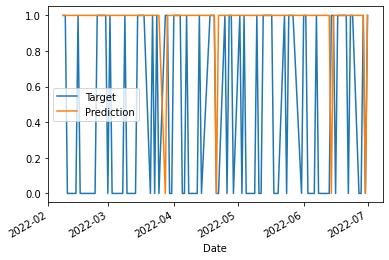

In [96]:
combined.plot()

In [113]:
start = 1000
step = 750

def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
    
        model.fit(train[predictors], train['Target'])
    
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index = test.index)
        preds[preds > 0.6] = 1
        preds[preds <= 0.6] = 0
    
        combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis= 1)
    
        predictions.append(combined)

    predictions = pd.concat(predictions)
    return predictions



0.0    7570
1.0     215
Name: Predictions, dtype: int64

In [114]:
predictions["Predictions"].value_counts()

0.0    7570
1.0     215
Name: Predictions, dtype: int64

In [99]:
precision_score(predictions['Target'], predictions["Predictions"])

0.49775112443778113

In [101]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [103]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]


In [105]:
predictions = backtest(data.iloc[365:], model, full_predictors)

In [106]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6046511627906976

In [108]:
predictions["Predictions"].value_counts()

0.0    7570
1.0     215
Name: Predictions, dtype: int64

<AxesSubplot:xlabel='Date'>

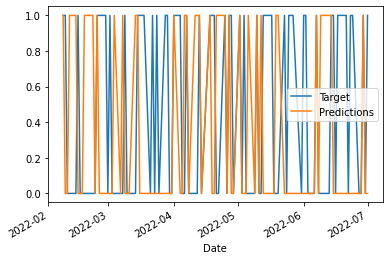

In [109]:
predictions.iloc[-100:].plot()